In [7]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn import linear_model as lm
import sklearn.preprocessing as pre
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.utils import shuffle
from sklearn import svm

import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook

from sklearn.svm import SVC

from IPython.display import display, Latex, Markdown

import warnings
warnings.filterwarnings("ignore")

In [8]:
data = pd.read_csv('mrc_table5.csv')

In [9]:
columns = ['cohort', 'name', 'type', 'tier', 'tier_name', 'iclevel',
       'region', 'state', 'county', 'count_m', 'par_mean_m', 'par_rank_m', \
          'par_q1_m', 'par_q2_m', 'par_q3_m', 'par_q4_m', 'par_q5_m', 'par_top10pc_m', 'par_top5pc_m', \
          'par_top1pc_m', 'par_toppt1pc_m', 'k_q1_m', 'k_q2_m', 'k_q3_m', 'k_q4_m', 'k_q5_m', \
          'count_f', 'par_mean_f', 'par_rank_f', 'mr_kq5_pq1_age20', 'mr_kq5_pq1_m', 'mr_kq5_pq1_f', \
          'par_q1_f', 'par_q2_f', 'par_q3_f', 'par_q4_f', 'par_q5_f', 'par_top10pc_f', 'par_top5pc_f', \
          'par_top1pc_f', 'par_toppt1pc_f', 'k_q1_f', 'k_q2_f', 'k_q3_f', 'k_q4_f', 'k_q5_f']

columns_no_metrics = ['cohort', 'name', 'type', 'tier', 'tier_name', 'iclevel',
       'region', 'state', 'county', 'count_m', 'par_mean_m', 'par_rank_m', \
          'par_q1_m', 'par_q2_m', 'par_q3_m', 'par_q4_m', 'par_q5_m', 'par_top10pc_m', 'par_top5pc_m', \
          'par_top1pc_m', 'par_toppt1pc_m',\
          'count_f', 'par_mean_f', 'par_rank_f', 'mr_kq5_pq1_age20', 'mr_kq5_pq1_m', 'mr_kq5_pq1_f', \
          'par_q1_f', 'par_q2_f', 'par_q3_f', 'par_q4_f', 'par_q5_f', 'par_top10pc_f', 'par_top5pc_f', \
          'par_top1pc_f', 'par_toppt1pc_f']
data_1 = data[columns_no_metrics]

In [10]:
data_1 = data_1.dropna()

In [11]:
data_1['name'].unique()

array(['ASA Institute Of Business & Computer Technology',
       'Abilene Christian University',
       'Abraham Baldwin Agricultural College', ...,
       'Youngstown State University', 'Yuba Community College District',
       'Zane State College'], dtype=object)

In [12]:
pd.set_option('display.max_columns', None)
data_1[data_1['name'] == 'ASA Institute Of Business & Computer Technology']

,cohort,name,type,tier,tier_name,iclevel,region,state,county,count_m,par_mean_m,par_rank_m,par_q1_m,par_q2_m,par_q3_m,par_q4_m,par_q5_m,par_top10pc_m,par_top5pc_m,par_top1pc_m,par_toppt1pc_m,count_f,par_mean_f,par_rank_f,mr_kq5_pq1_age20,mr_kq5_pq1_m,mr_kq5_pq1_f,par_q1_f,par_q2_f,par_q3_f,par_q4_f,par_q5_f,par_top10pc_f,par_top5pc_f,par_top1pc_f,par_toppt1pc_f
3,1983,ASA Institute Of Business & Computer Technology,3.0,11,Two-year for-profit,2.0,1.0,NY,Kings,52.0,33833.484375,0.267906,0.440599,0.366877,0.096647,0.058159,0.037718,0.000000,0.000000,0.0,0.0,197.0,34889.710938,0.267968,0.007857,0.017870,0.005117,0.455193,0.260613,0.192258,0.075756,0.016180,0.014387,0.010109,0.000000,0.000000
4,1984,ASA Institute Of Business & Computer Technology,3.0,11,Two-year for-profit,2.0,1.0,NY,Kings,78.0,33000.671875,0.278202,0.357310,0.410071,0.151134,0.051784,0.029701,0.000000,0.000000,0.0,0.0,294.0,29195.226562,0.235297,0.027361,0.000000,0.030478,0.493255,0.344769,0.106721,0.035013,0.020243,0.000000,0.000000,0.000000,0.000000
5,1985,ASA Institute Of Business & Computer Technology,3.0,11,Two-year for-profit,2.0,1.0,NY,Kings,90.0,36690.152344,0.288149,0.400925,0.366272,0.119568,0.102060,0.011176,0.002150,0.000251,0.0,0.0,321.0,35303.429688,0.265607,0.035296,0.066489,0.024722,0.441038,0.321158,0.162599,0.044123,0.031082,0.002081,0.002081,0.002081,0.000099
6,1986,ASA Institute Of Business & Computer Technology,3.0,11,Two-year for-profit,2.0,1.0,NY,Kings,137.0,31757.449219,0.287130,0.393942,0.304675,0.238520,0.059238,0.003624,0.001121,0.001121,0.0,0.0,341.0,28973.449219,0.242707,0.016041,0.043601,0.017546,0.474747,0.353473,0.114687,0.041707,0.015386,0.002375,0.001351,0.000363,0.000000
7,1987,ASA Institute Of Business & Computer Technology,3.0,11,Two-year for-profit,2.0,1.0,NY,Kings,177.0,26818.912109,0.253622,0.488005,0.314388,0.127398,0.058506,0.011703,0.004623,0.000000,0.0,0.0,463.0,29226.462891,0.243967,0.054742,0.023232,0.034620,0.486835,0.293701,0.176065,0.035263,0.008135,0.001902,0.000000,0.000000,0.000000
8,1988,ASA Institute Of Business & Computer Technology,3.0,11,Two-year for-profit,2.0,1.0,NY,Kings,277.0,31242.806641,0.278155,0.451601,0.276663,0.203774,0.053587,0.014375,0.007483,0.000000,0.0,0.0,501.0,28394.917969,0.254954,0.026180,0.028671,0.011956,0.457611,0.322456,0.157583,0.052045,0.010305,0.001175,0.000374,0.000072,0.000000
9,1989,ASA Institute Of Business & Computer Technology,3.0,11,Two-year for-profit,2.0,1.0,NY,Kings,354.0,34304.109375,0.289807,0.420615,0.280725,0.213839,0.066800,0.018022,0.001101,0.000000,0.0,0.0,600.0,30951.089844,0.270174,0.021121,0.039169,0.013709,0.447270,0.304699,0.172037,0.062931,0.013062,0.004524,0.004175,0.000000,0.000000
10,1990,ASA Institute Of Business & Computer Technology,3.0,11,Two-year for-profit,2.0,1.0,NY,Kings,403.0,32922.972656,0.290007,0.406884,0.333995,0.174615,0.067540,0.016966,0.003377,0.002447,0.0,0.0,578.0,27540.912109,0.258380,0.027972,0.029637,0.024227,0.478594,0.305234,0.150658,0.050082,0.015433,0.008541,0.002282,0.000068,0.000067
11,1991,ASA Institute Of Business & Computer Technology,3.0,11,Two-year for-profit,2.0,1.0,NY,Kings,410.0,31722.675781,0.309700,0.391366,0.303492,0.199013,0.072696,0.033432,0.007406,0.000000,0.0,0.0,544.0,30325.076172,0.284898,0.061365,0.041862,0.052584,0.408202,0.307282,0.211042,0.063238,0.010236,0.002371,0.002371,0.001434,0.000042


In [13]:
cols_to_group = ['name', 'type', 'tier', 'tier_name', 'iclevel', 'region', 'state', 'county']
cols_to_ave = ['count_m', 'par_mean_m', 'par_rank_m','par_q1_m', 'par_q2_m', 'par_q3_m', 'par_q4_m', 'par_q5_m', 'par_top10pc_m', 'par_top5pc_m', \
               'par_top1pc_m', 'par_toppt1pc_m', 'k_q1_m', 'k_q2_m', 'k_q3_m', 'k_q4_m', 'k_q5_m','count_f', 'par_mean_f', 'par_rank_f', \
               'par_q1_f', 'par_q2_f', 'par_q3_f', 'par_q4_f', 'par_q5_f', 'par_top10pc_f', 'par_top5pc_f', \
               'par_top1pc_f', 'par_toppt1pc_f', 'k_q1_f', 'k_q2_f', 'k_q3_f', 'k_q4_f', 'k_q5_f', \
              'mr_kq5_pq1_age20', 'mr_kq5_pq1_m', 'mr_kq5_pq1_f']
cols_to_ave_no_metrics = ['count_m', 'par_mean_m', 'par_rank_m','par_q1_m', 'par_q2_m', 'par_q3_m', 'par_q4_m', 'par_q5_m', 'par_top10pc_m', 'par_top5pc_m', \
               'par_top1pc_m', 'par_toppt1pc_m','count_f', 'par_mean_f', 'par_rank_f', \
               'par_q1_f', 'par_q2_f', 'par_q3_f', 'par_q4_f', 'par_q5_f', 'par_top10pc_f', 'par_top5pc_f', \
               'par_top1pc_f', 'par_toppt1pc_f', \
              'mr_kq5_pq1_age20', 'mr_kq5_pq1_m', 'mr_kq5_pq1_f']
uni_data = data_1.groupby(cols_to_group, as_index = False)[cols_to_ave_no_metrics].mean()

# uni_data has columns that dont make a lot of sense but since the same transformation has been
# applied to all the data points it shouldnt matter for similarity

In [14]:
uni_data.head(2)

,name,type,tier,tier_name,iclevel,region,state,county,count_m,par_mean_m,par_rank_m,par_q1_m,par_q2_m,par_q3_m,par_q4_m,par_q5_m,par_top10pc_m,par_top5pc_m,par_top1pc_m,par_toppt1pc_m,count_f,par_mean_f,par_rank_f,par_q1_f,par_q2_f,par_q3_f,par_q4_f,par_q5_f,par_top10pc_f,par_top5pc_f,par_top1pc_f,par_toppt1pc_f,mr_kq5_pq1_age20,mr_kq5_pq1_m,mr_kq5_pq1_f
0,ASA Institute Of Business & Computer Technology,3.0,11,Two-year for-profit,2.0,1.0,NY,Kings,219.777778,32477.026042,0.282520,0.416805,0.328573,0.169390,0.065597,0.019635,0.003029,0.000424,0.000000,0.000000,426.555556,30533.363932,0.258217,0.460305,0.312598,0.160406,0.051128,0.015562,0.004151,0.002527,0.000446,0.000023,0.030882,0.032281,0.023884
1,Abilene Christian University,2.0,6,Selective private,1.0,3.0,TX,Taylor,364.500000,167309.361979,0.704246,0.047610,0.089820,0.152779,0.247925,0.461865,0.272828,0.148296,0.026485,0.002128,449.166667,152498.831380,0.699332,0.048469,0.086129,0.156709,0.260350,0.448343,0.252298,0.135608,0.023491,0.001473,0.011888,0.015753,0.008965


In [15]:
# pre processing

uni_data_1 = uni_data.copy()
#uni_data_1 = uni_data_1.drop('tier_name',1)
mobility = uni_data_1[['name', 'mr_kq5_pq1_age20', 'mr_kq5_pq1_m', 'mr_kq5_pq1_f']]
uni_data_1 = uni_data_1.drop(['name', 'mr_kq5_pq1_age20', 'mr_kq5_pq1_m', 'mr_kq5_pq1_f'],1)

In [16]:
# add extra features
'''
qs_m = []
for i, row in uni_data_1.iterrows():
    quantile = np.argmax(uni_data_1[['k_q1_m', 'k_q2_m', 'k_q3_m', 'k_q4_m', 'k_q5_m']].loc[i].values) + 1
    qs_m.append(quantile)

qs_f = []
for i, row in uni_data_1.iterrows():
    quantile = np.argmax(uni_data_1[['k_q1_f', 'k_q2_f', 'k_q3_f', 'k_q4_f', 'k_q5_f']].loc[i].values) + 1
    qs_f.append(quantile)

uni_data_1['label_m'] = qs_m
uni_data_1['label_f'] = qs_f
'''

"\nqs_m = []\nfor i, row in uni_data_1.iterrows():\n    quantile = np.argmax(uni_data_1[['k_q1_m', 'k_q2_m', 'k_q3_m', 'k_q4_m', 'k_q5_m']].loc[i].values) + 1\n    qs_m.append(quantile)\n\nqs_f = []\nfor i, row in uni_data_1.iterrows():\n    quantile = np.argmax(uni_data_1[['k_q1_f', 'k_q2_f', 'k_q3_f', 'k_q4_f', 'k_q5_f']].loc[i].values) + 1\n    qs_f.append(quantile)\n\nuni_data_1['label_m'] = qs_m\nuni_data_1['label_f'] = qs_f\n"

In [17]:
uni_data_2 = pd.get_dummies(uni_data_1)

In [18]:
from sklearn.preprocessing import scale
for c in uni_data_2.columns:
    uni_data_2[c] = scale(uni_data_2[c].values)


In [19]:
uni_data_2.shape, uni_data_1.shape

((2262, 910), (2262, 31))

## Kmeans

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++',n_clusters=20, random_state=0).fit(uni_data_2)

In [21]:
mobility['cluster_n'] = kmeans.labels_
centers = kmeans.cluster_centers_
distances = kmeans.transform(uni_data_2)

In [22]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, random_state=0)
tsne_kmeans = tsne_model.fit_transform(distances)
kmeans_centers = kmeans.predict(uni_data_2)

colormap = np.array(["#6d8dca", "#69de53", "#723bca", "#c3e14c", "#c84dc9", "#68af4e", "#6e6cd5",
"#e3be38", "#4e2d7c", "#5fdfa8", "#d34690", "#3f6d31", "#d44427", "#7fcdd8", "#cb4053", "#5e9981",
"#803a62", "#9b9e39", "#c88cca", "#e1c37b", "#34223b", "#bdd8a3", "#6e3326", "#cfbdce", "#d07d3c",
"#52697d", "#7d6d33", "#d27c88", "#36422b", "#b68f79"])

plot_kmeans = bp.figure(plot_width=700, plot_height=600, title="KMeans clustering of the colleges",
    x_axis_type=None, y_axis_type=None, min_border=1)

k_df = pd.DataFrame(tsne_kmeans, columns=['x', 'y'])
k_df['cluster'] = kmeans_centers
plot_kmeans.scatter(x=k_df['x'], y=k_df['y'], 
                    color=colormap[kmeans_centers])
show(plot_kmeans)

## PCA

The first component explains nearly all the variance!

The most relevant features of the 1st Principal Component are 'count_m/f' and 'par_mean_m/f'.


In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20).fit(uni_data_2)
components = pca.transform(uni_data_2)
best_features = np.where(abs(pca.components_[0]) >0.2)[0]
print([uni_data_2.iloc[:, [k]].columns[0] for k in best_features])
print(pca.explained_variance_ratio_) 

['par_mean_m', 'par_rank_m', 'par_q5_m', 'par_top10pc_m', 'par_top5pc_m', 'par_top1pc_m', 'par_mean_f', 'par_rank_f', 'par_q2_f', 'par_q5_f', 'par_top10pc_f', 'par_top5pc_f', 'par_top1pc_f']
[ 0.01924965  0.00647669  0.0037359   0.00315718  0.00295044  0.00275373
  0.0023777   0.00234736  0.00223827  0.00220804  0.00219101  0.00218274
  0.00218257  0.00217217  0.00215418  0.00214832  0.00214269  0.00213749
  0.00212773  0.00211941]


In [25]:
# using pcs to cluster with Kmeans
kmeans = KMeans(init=pca.components_ ,n_clusters=20, random_state=0).fit(uni_data_2)
mobility['cluster_n'] = kmeans.labels_
centers = kmeans.cluster_centers_
distances = kmeans.transform(uni_data_2)
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, random_state=0)
tsne_kmeans = tsne_model.fit_transform(distances)
kmeans_centers = kmeans.predict(uni_data_2)

colormap = np.array(["#6d8dca", "#69de53", "#723bca", "#c3e14c", "#c84dc9", "#68af4e", "#6e6cd5",
"#e3be38", "#4e2d7c", "#5fdfa8", "#d34690", "#3f6d31", "#d44427", "#7fcdd8", "#cb4053", "#5e9981",
"#803a62", "#9b9e39", "#c88cca", "#e1c37b", "#34223b", "#bdd8a3", "#6e3326", "#cfbdce", "#d07d3c",
"#52697d", "#7d6d33", "#d27c88", "#36422b", "#b68f79"])

plot_kmeans = bp.figure(plot_width=700, plot_height=600, title="KMeans clustering of the colleges",
    x_axis_type=None, y_axis_type=None, min_border=1)

k_df = pd.DataFrame(tsne_kmeans, columns=['x', 'y'])
k_df['cluster'] = kmeans_centers
plot_kmeans.scatter(x=k_df['x'], y=k_df['y'], 
                    color=colormap[kmeans_centers])
show(plot_kmeans)

In [26]:
clusters = (mobility
 .groupby('cluster_n')[['mr_kq5_pq1_age20', 'mr_kq5_pq1_m', 'mr_kq5_pq1_f']]
 .mean()
 .sort_values(by='mr_kq5_pq1_age20', ascending=False)
 )

In [27]:
clusters

,mr_kq5_pq1_age20,mr_kq5_pq1_m,mr_kq5_pq1_f
cluster_n,,,
1,0.027034,0.036265,0.018120
2,0.022122,0.024632,0.018589
18,0.021081,0.028397,0.013899
7,0.019204,0.023108,0.014799
9,0.018862,0.025117,0.012764
8,0.017463,0.021788,0.013746
3,0.017372,0.020297,0.014115
16,0.017010,0.021833,0.012004
4,0.016917,0.017888,0.015387


In [28]:
clusters_name = (mobility
                .groupby('cluster_n')['name']
                .apply(lambda x: ', '.join(x))
                 )
clustersname = pd.DataFrame()
clustersname['name'] = clusters_name.values

In [29]:
clustersname

,name
0,"American University , Amherst College, Babson ..."
1,ASA Institute Of Business & Computer Technolog...
2,"Academy Of Art University, Allan Hancock Colle..."
3,"Alabama Agricultural & Mechanical University, ..."
4,"Adelphi University, Adirondack Community Colle..."
5,"Allegany College Of Maryland, Anne Arundel Com..."
6,"Allen County Community College, American Insti..."
7,"Abraham Baldwin Agricultural College, Art Inst..."
8,Anthem College And The Bryman School Of Arizon...
9,"Abilene Christian University, Alvin Community ..."


In [30]:
full_clusters = (clusters.merge(clustersname, on=None, left_index=True, right_index=True)
                 .sort_values(by = 'mr_kq5_pq1_age20', ascending = False)
                 )

In [31]:
full_clusters

,mr_kq5_pq1_age20,mr_kq5_pq1_m,mr_kq5_pq1_f,name
1,0.027034,0.036265,0.018120,ASA Institute Of Business & Computer Technolog...
2,0.022122,0.024632,0.018589,"Academy Of Art University, Allan Hancock Colle..."
18,0.021081,0.028397,0.013899,"Barton County Community College, Baton Rouge C..."
7,0.019204,0.023108,0.014799,"Abraham Baldwin Agricultural College, Art Inst..."
9,0.018862,0.025117,0.012764,"Abilene Christian University, Alvin Community ..."
8,0.017463,0.021788,0.013746,Anthem College And The Bryman School Of Arizon...
3,0.017372,0.020297,0.014115,"Alabama Agricultural & Mechanical University, ..."
16,0.017010,0.021833,0.012004,"American Intercontinental University, Aurora U..."
4,0.016917,0.017888,0.015387,"Adelphi University, Adirondack Community Colle..."
13,0.016432,0.020535,0.012310,Asheville Buncombe Technical Community College...


In [33]:
mobility.sort_values(by = 'mr_kq5_pq1_age20', ascending = False).head(20)

,name,mr_kq5_pq1_age20,mr_kq5_pq1_m,mr_kq5_pq1_f,cluster_n
224,CUNY Bernard M. Baruch College,0.119430,0.109670,0.119192,1
231,CUNY Lehman College,0.089314,0.106383,0.080538,1
360,City College Of New York - CUNY,0.088708,0.098475,0.074076,1
1858,Texas A&M International University,0.085492,0.098949,0.069869,1
2061,University Of Texas - Pan American,0.079212,0.091812,0.063163,1
1292,New York City College Of Technology Of The Cit...,0.077538,0.084646,0.055131,1
229,CUNY John Jay College Of Criminal Justice,0.077052,0.087077,0.065195,1
2190,"Western Technical College of El Paso, TX",0.071704,0.104796,0.016932,1
259,"California State University, Los Angeles",0.069605,0.080212,0.059156,2
1842,Technical Career Institutes,0.067491,0.066284,0.028452,1


In [34]:
def dist_cluster(cluster, df, mob):
    cluster_nms = df.loc[cluster, 'name'].split(', ')
    in_ = [name in cluster_nms for name in mobility['name']]
    mobilities_ = mobility[in_][mob]
    return mobilities_

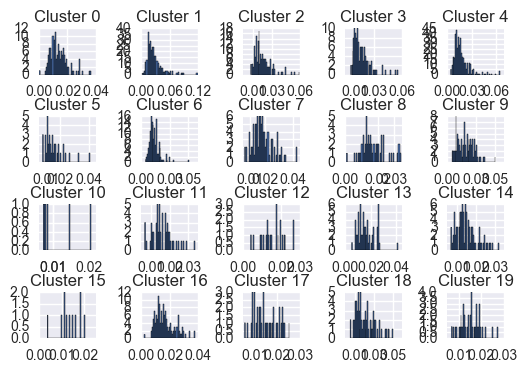

In [35]:
f, axs = plt.subplots(4,5)
axs = axs.ravel()
f.subplots_adjust(hspace=.9)
f.subplots_adjust(wspace=.8)
for i in range(centers.shape[0]):
    v = dist_cluster(i, full_clusters, 'mr_kq5_pq1_age20')
    axs[i].hist(v, bins=50)
    title = 'Cluster ' + str(i)
    axs[i].set_title(title)
    rang = np.round_(np.linspace(min(v), max(v), 3), 2)
    axs[i].set_xticks(rang)
plt.show()

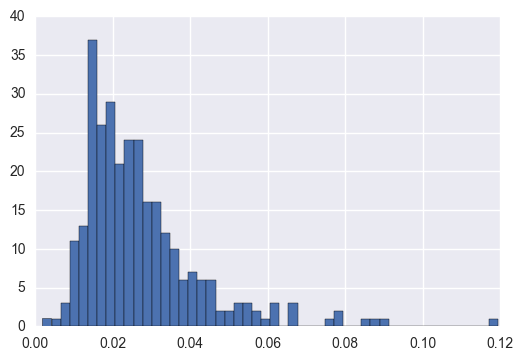

In [36]:
# analyze CUNY Bernard M. Baruch College cluster 

mobility_6 = dist_cluster(1, full_clusters, 'mr_kq5_pq1_age20')
mobility_6.hist(bins=50)

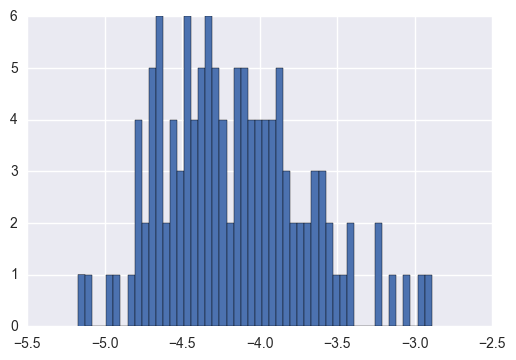

In [37]:
# analyze CUNY Bernard M. Baruch College cluster number 6, with logs

mobility_6 = np.log(dist_cluster(3, full_clusters, 'mr_kq5_pq1_age20'))
mobility_6.hist(bins=50)

In [38]:
def important_features(names, n_important):
    '''
        input: list of college names
        output: dictionary with features and point values
        
        This function finds the 5 features that increase the euclidean distance of each college from the 
        closest cluster center the most and and builds a dictionary where these features are the keys and the 
        values are a sum of the pts obtained by each feature.
        Each time a feature is ranked i in 1 to 5 it gets 5 - i points.
        At the end features with most points are the features that for each college make them the most different to
        the other colleges in the cluster.
    
    '''
    
    dic = {}
    for n in names:
        idx = uni_data_2[mobility['name'] == n].index[0]
        vect = uni_data_2.loc[idx,:]
        dists = pd.DataFrame([(vect[i]-centers[4,i])**2 for i in range(uni_data_2.shape[1])]).sort_values(by=0, ascending=False)
        best_five = dists.head(n_important).index
        for i in range(len(best_five)):
            feat = best_five[i]
            if feat not in dic.keys():
                dic[feat] = 0
            dic[feat] += n_important - i
    return dic

In [39]:
names= mobility.sort_values(by = 'mr_kq5_pq1_age20', ascending = False)['name'].head(300).values

In [40]:
fs = important_features(names, 8)

In [41]:
fs_n = {}
for k in fs.keys():
    fs_n[uni_data_2.iloc[:, [k]].columns[0]] = fs[k]

In [42]:
fs_n

{'count_f': 93,
 'count_m': 114,
 'county_Alameda': 24,
 'county_Albany': 24,
 'county_Allegheny': 8,
 'county_Allen': 8,
 'county_Arlington': 8,
 'county_Baldwin': 8,
 'county_Bedford': 8,
 'county_Bee': 8,
 'county_Bergen': 16,
 'county_Bexar': 40,
 'county_Brazoria': 8,
 'county_Brevard': 8,
 'county_Brewster': 8,
 'county_Bronx': 48,
 'county_Broome': 8,
 'county_Broward': 24,
 'county_Caddo': 8,
 'county_Calcasieu': 8,
 'county_Camden': 8,
 'county_Cameron': 16,
 'county_Chatham': 8,
 'county_Chester': 8,
 'county_Chesterfield': 8,
 'county_Claiborne': 8,
 'county_Clark': 7,
 'county_Collier': 16,
 'county_Conecuh': 8,
 'county_Cook': 72,
 'county_Copiah': 8,
 'county_Cumberland': 8,
 'county_Dallas': 8,
 'county_Davidson': 16,
 'county_DeKalb': 8,
 'county_Delaware': 24,
 'county_Desoto': 8,
 'county_District Of Columbia': 15,
 'county_Dougherty': 8,
 'county_East Baton Rouge': 24,
 'county_Eastland': 16,
 'county_Ector': 16,
 'county_El Paso': 40,
 'county_Erie': 8,
 'county_Esc

### Preliminary Results

1. For 5 important features we get that the most important features are almost exclusively the parent mean income as well as the university tier
2. For 10 important features tier, type, parent mean income and count are still the most important, but many county dummies also appear to have influence. 

From this we conclude that the most important features regard the type of college and family background, but that if we consider a larger range of features region, specially county, becomes important! It is also worth to note that in tier the most important features are Two-year and Selective public and Selective private as well as ivy+.

These results are consistent with the PCA of the data!

In [43]:
import operator

sorted_fs = sorted(fs_n.items(), key=operator.itemgetter(1))
final_features = pd.DataFrame()
final_features = final_features.from_dict(sorted_fs).sort_values(by=1, ascending=False)
final_features.columns = ['feature', 'score']

In [44]:
final_features

,feature,score
223,par_q1_m,561
222,par_q1_f,550
221,par_q2_f,497
220,region,472
219,par_q2_m,454
218,state_NY,424
217,state_CA,344
216,state_TX,341
215,tier_name_Selective private,329
214,par_q4_f,325
